<a href="https://colab.research.google.com/github/DoraSzasz/covid_19_visualization_workshop/blob/master/2_Explore_Latest_Illinois_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. **EXPLORING THE COVID-19 DATA**

---




## COVID-19 DATA
* The Research Computing Center (RCC) at The University of Chicago hosts COVID-19 datasets, so our users can have them in a centralized place, at https://projects.rcc.uchicago.edu/rcc/covid19-data/

* The following are COVID-19 HPC datasets the RCC hosts on Midway:


> 1.  [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://projects.rcc.uchicago.edu/rcc/covid19-data/COVID-19/)
> 2.  [Data assembled by the NYC Department of Health and Mental Hygiene (DOHMH)](https://projects.rcc.uchicago.edu/rcc/covid19-data/coronavirus-data/)
> 3. [The New York Times series of data files with cumulative counts of coronavirus cases in the United States](https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-data/)
> 4. [RCC curates and maintains source data that is used to create the COVID-19 ZIP Map organized by the Illinois Department of Public Health](https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/)

## Explore Illinoi's Recent Data

* We will be using the Illinois COVID-19 data available at: https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/

In [0]:
# import pandas and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# create the data frame
df = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/confirmed_cases_by_zip.csv")

In [0]:
# display first 10 rows of the confirmed cases arranged by zip
df.head(10)

,zip,confirmed_cases
0,60628,288
1,60505,61
2,60176,17
3,60053,59
4,60142,16
5,60477,47
6,60148,67
7,60025,116
8,60901,121
9,60031,57


In [0]:
# read the latest COVID-19 confirmed cases and deaths data organized by age
by_age = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_age.csv")
by_age.head(10)

,last_update,age_group,count,deaths
0,2020-4-11,Unknown,8,0
1,2020-4-11,<20,402,1
2,2020-4-11,20-29,2491,3
3,2020-4-11,30-39,3200,13
4,2020-4-11,40-49,3874,31
5,2020-4-11,50-59,4179,70
6,2020-4-11,60-69,3224,135
7,2020-4-11,70-79,1978,201
8,2020-4-11,80+,1496,266


In [0]:
# set the index to be age_group
by_age.set_index('age_group', drop=True, inplace=True)
by_age.head(10)

,last_update,count,deaths
age_group,,,
Unknown,2020-4-11,8,0
<20,2020-4-11,402,1
20-29,2020-4-11,2491,3
30-39,2020-4-11,3200,13
40-49,2020-4-11,3874,31
50-59,2020-4-11,4179,70
60-69,2020-4-11,3224,135
70-79,2020-4-11,1978,201
80+,2020-4-11,1496,266


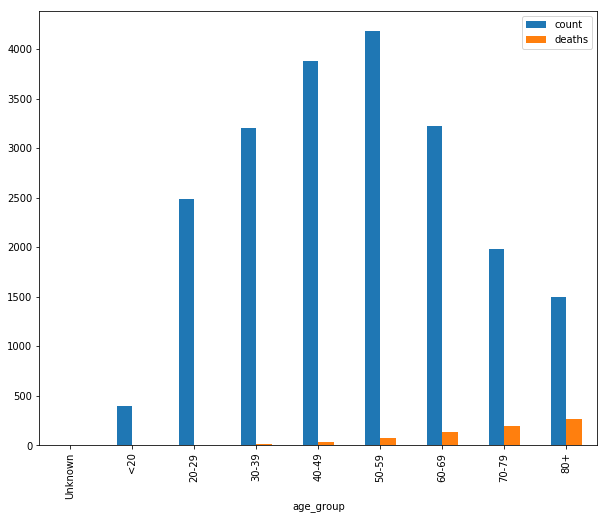

In [0]:
# plot the number of confirmed cases and the deaths by age
ax = by_age.plot(kind='bar', figsize=(10, 8))

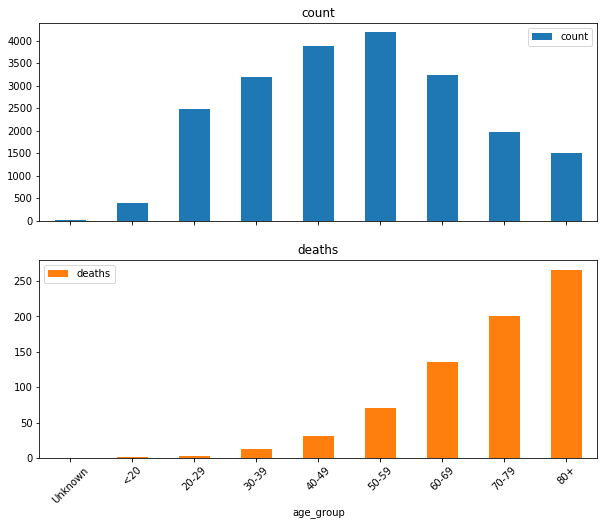

In [0]:
# plot the number of confirmed cases and the number of deaths independently, to show the increase of number of deaths with the age
age_axes = by_age.plot.bar(rot=45, subplots=True, figsize=(10, 8))

Text(0,0.5,'mortality rate')

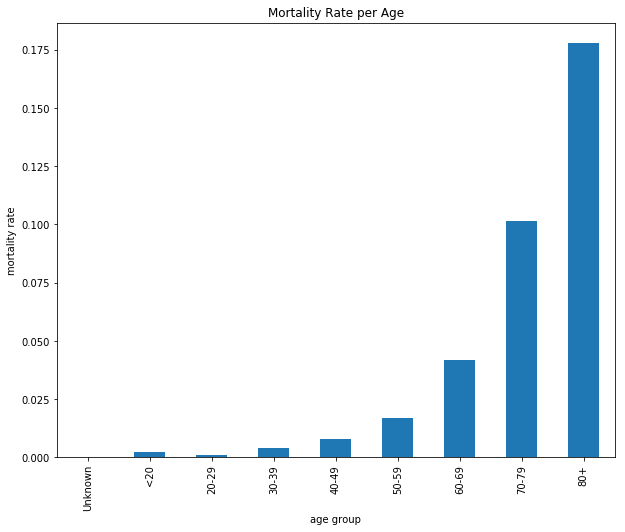

In [0]:
# plot the mortality rate by age
plt.figure(figsize=(10, 8))
mortality_by_age = by_age['deaths'] / by_age['count']
mortality_by_age.plot(kind='bar', title='Mortality Rate per Age')
plt.xlabel('age group')
plt.ylabel('mortality rate')

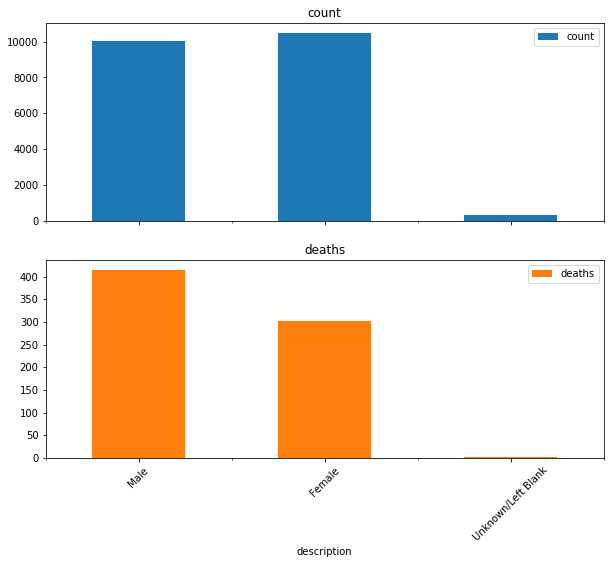

In [0]:
# plot the number of confirmed cases and the number of deaths independently, to show the increase of number of deaths with the gender
by_gender = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_gender.csv")
by_gender.set_index('description', drop=True, inplace=True)
by_gender.plot.bar(rot=45, subplots=True, figsize=(10, 8));

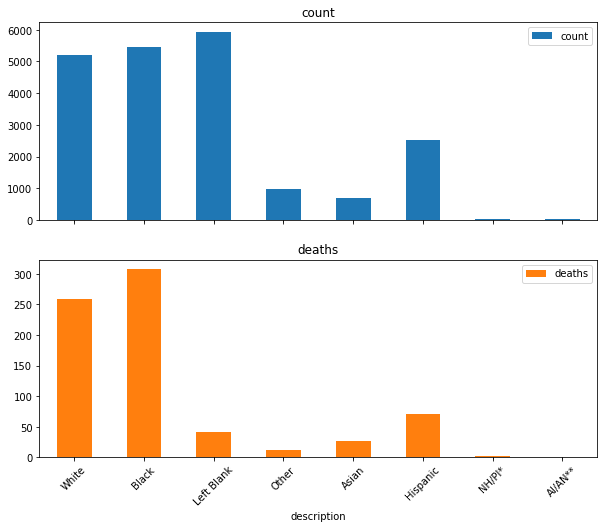

In [0]:
# plot the number of confirmed cases and the deaths by race
by_race = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/characteristics_by_race.csv")
by_race.set_index('description', drop=True, inplace=True)
by_race.plot.bar(rot=45, subplots=True, figsize=(10, 8));

[Text(0.5,0,'race')]

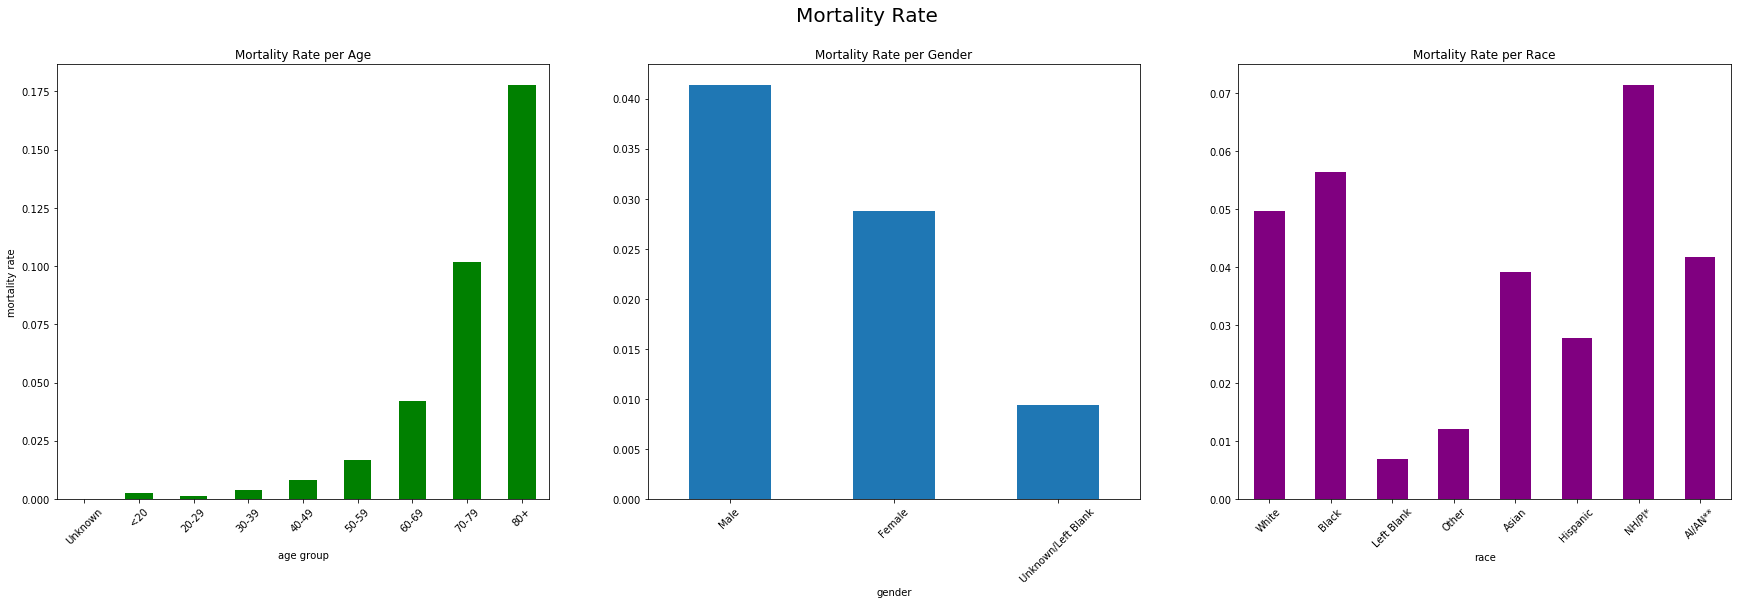

In [0]:
mortality_by_age = by_age['deaths'] / by_age['count']
mortality_by_gender = by_gender['deaths'] / by_gender['count']
mortality_by_race = by_race['deaths'] / by_race['count']

# plot the mortality rate by age, gender, and race
fig, axes = plt.subplots(1,3, figsize=(30, 8))
fig.suptitle('Mortality Rate', fontsize=20)

mortality_by_age.plot(kind='bar', title='Mortality Rate per Age', ax=axes[0], color='green', rot=45)
axes[0].set(xlabel='age group')
axes[0].set(ylabel='mortality rate')

mortality_by_gender.plot(kind='bar', title='Mortality Rate per Gender', ax=axes[1], rot=45)
axes[1].set(xlabel='gender')

mortality_by_race.plot(kind='bar', title='Mortality Rate per Race', ax=axes[2], color='purple', rot=45)
axes[2].set(xlabel='race')


In [0]:
# plot the number of tested, confirmed cases, deaths, and negative by County, today
by_county = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results_by_county.csv")
by_county.set_index('County', drop=True, inplace=True)

today = "4/11/2020"
today_by_county=by_county[by_county.testDate == today]
print(today_by_county)


             testDate  total_tested  confirmed_cases  deaths  negative
County                                                                
Illinois    4/11/2020         92779            19180     677         0
Chicago     4/11/2020             0             7784     249         0
Adams       4/11/2020             0               25       0         0
Alexander   4/11/2020             0                0       0         0
Bond        4/11/2020             0                4       0         0
...               ...           ...              ...     ...       ...
Whiteside   4/11/2020             0               25       1         0
Will        4/11/2020             0             1126      56         0
Williamson  4/11/2020             0               10       0         0
Winnebago   4/11/2020             0               80       4         0
Woodford    4/11/2020             0                7       0         0

[105 rows x 5 columns]


In [0]:
#If you have not Seaborn library installed, install it by commenting next line
#!pip install seaborn
import seaborn as sns

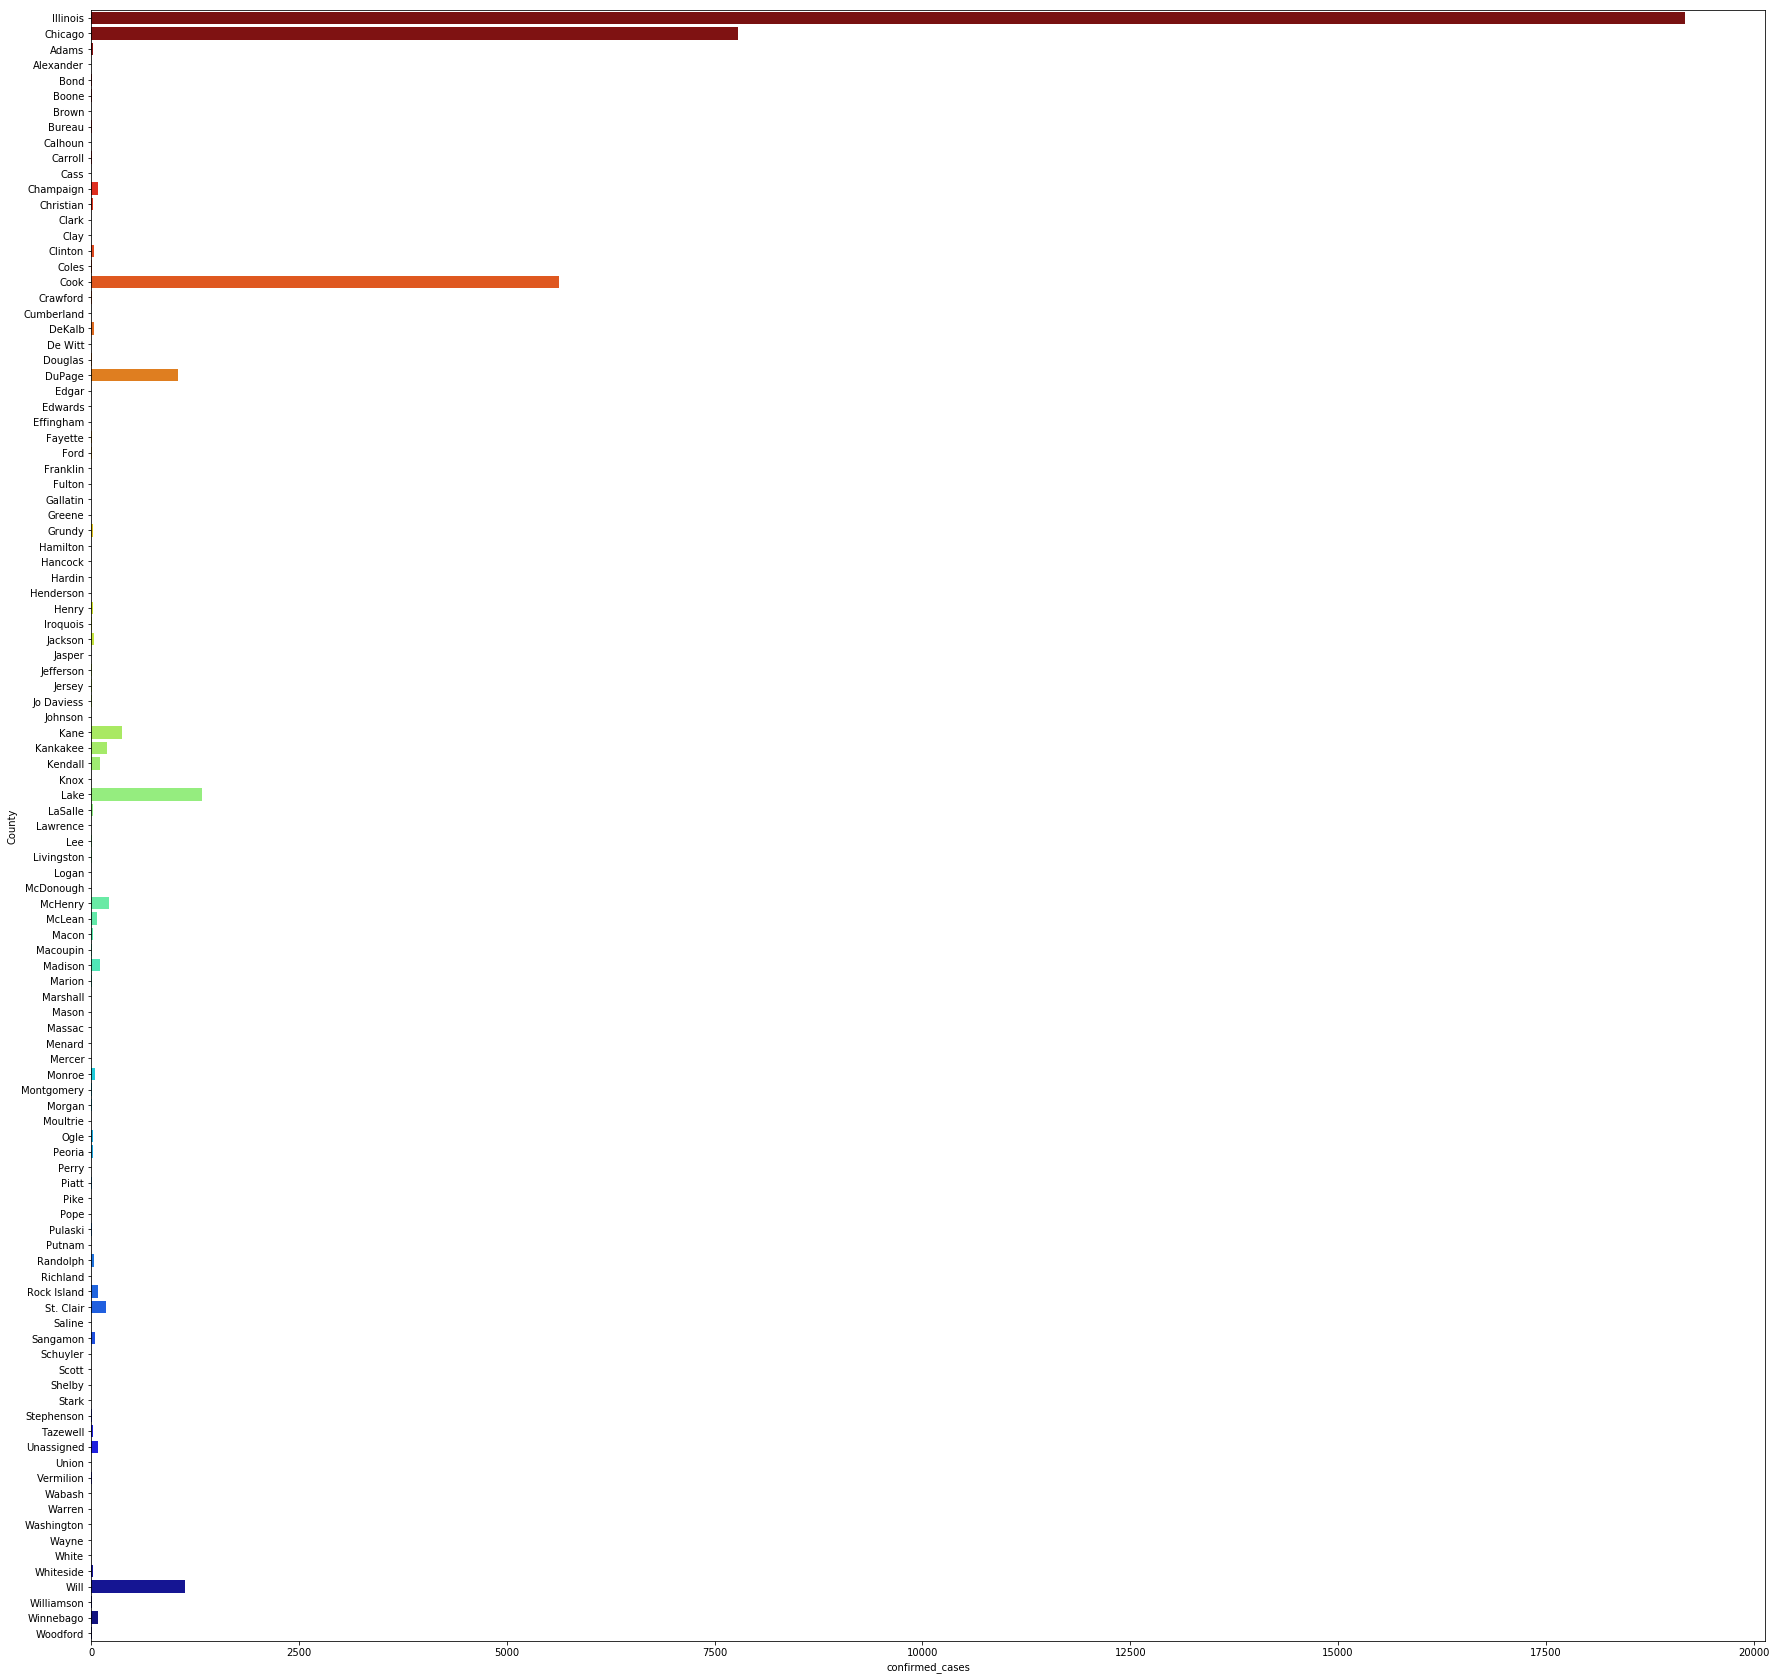

In [0]:
plt.figure(figsize = (30, 30))
sns.barplot(y = today_by_county.index, x = "confirmed_cases", data = today_by_county, palette="jet_r")


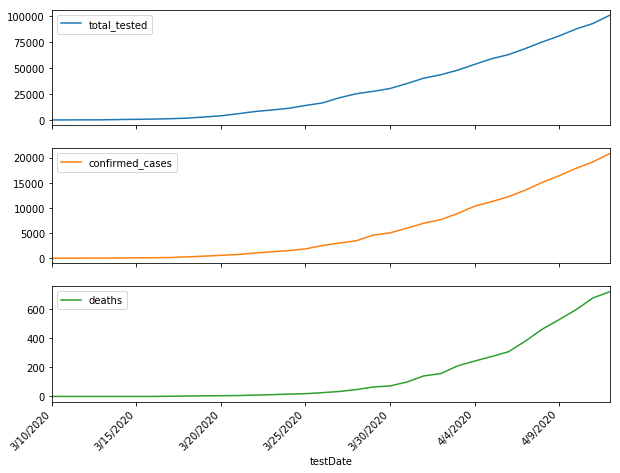

In [0]:
#plot the historical data of the number of tested, confirmed, and death cases
cases_history = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results.csv")
cases_history.set_index('testDate', drop=True, inplace=True)
cases_history.plot.line(rot=45, subplots=True, figsize=(10, 8));

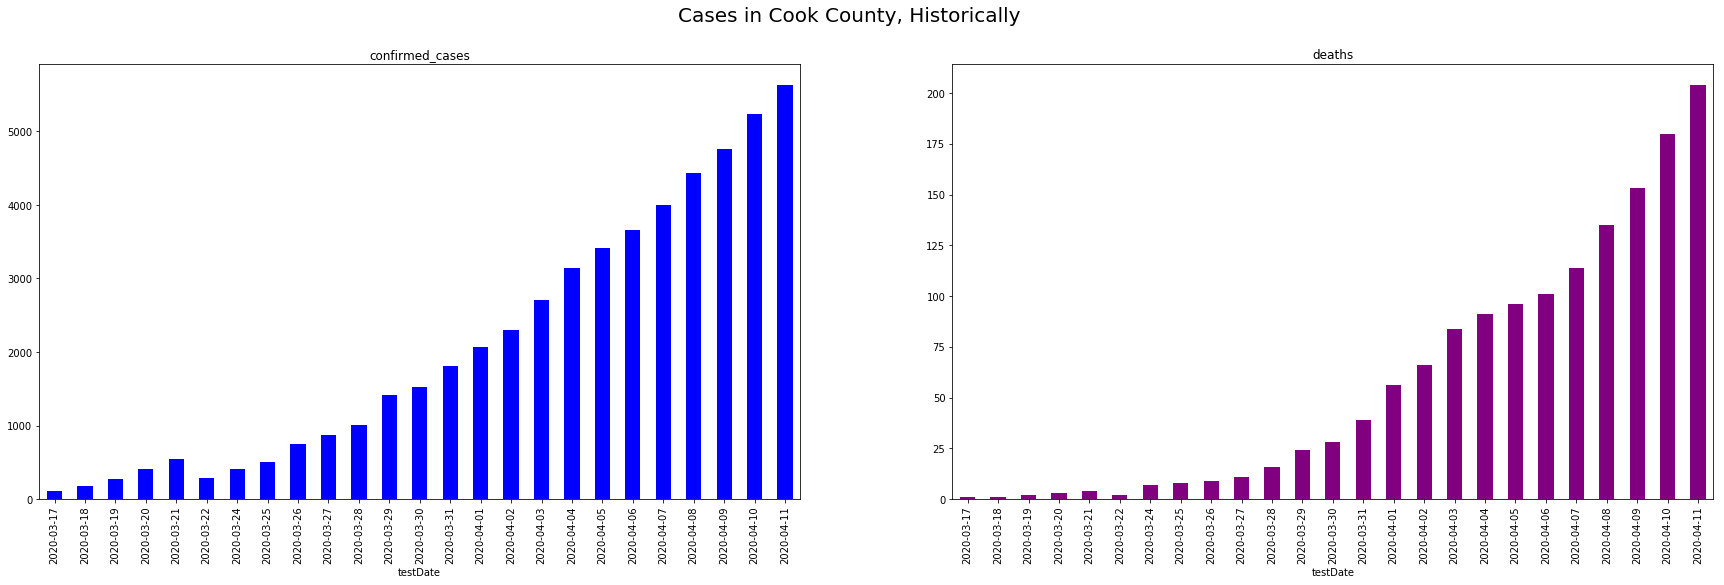

In [0]:
#plot the historical data of the number of confirmed cases in Cook County
cases_county_history = pd.read_csv("https://projects.rcc.uchicago.edu/rcc/covid19-data/covid-19-illinois-data/historical_state_testing_results_by_county.csv")
cases_county_history['testDate']= pd.to_datetime(cases_county_history['testDate']).dt.date
cases_county_history.set_index('testDate', drop=True, inplace=True)
cases_county_history.sort_index(ascending=True, inplace=True)

cook_county_history = cases_county_history.loc[cases_county_history['County']=='Cook']

# plot the number of confirmed, tested, and deaths in Cook County, historically 
fig, axes = plt.subplots(1,2, figsize=(30, 8))
fig.suptitle('Cases in Cook County, Historically', fontsize=20)

cook_county_history['confirmed_cases'].plot.bar(rot=90, subplots=True, figsize=(10, 8), ax=axes[0], color='blue');
cook_county_history['deaths'].plot.bar(rot=90, subplots=True, figsize=(10, 8), ax=axes[1], color='purple');
